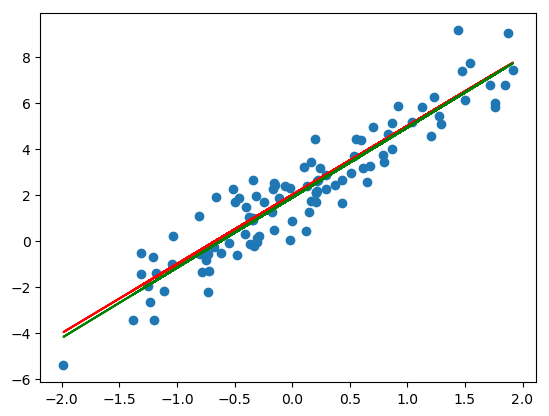

1.884235818328461 3.046211103118652


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f58e81df950>

In [1]:
using PyPlot

f(x) = 2 + 3*x

r = MersenneTwister(10)
x = randn(r,100)
y = f(x)
y_train = y + 1*randn(length(y))

scatter(x, y_train)
plot(x, y, color="red")
a, b = linreg(x, y_train)
println("$a $b")
plot(x,[a+b*i for i in x], color="green")

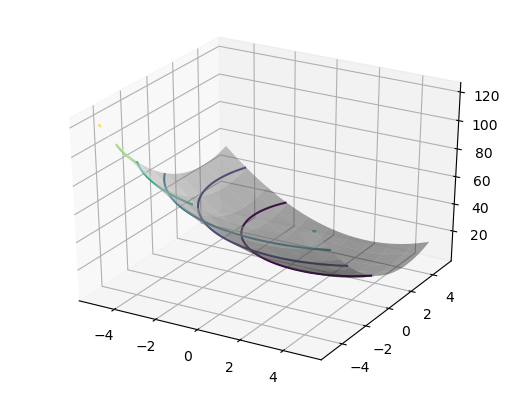

PyObject <matplotlib.contour.QuadContourSet object at 0x7f58e80e7dd0>

In [2]:
f(x) = 2 + 3*x
fe(m,c,x) = m*x+c
loss(m,c,x) = (f(x) - fe(m,c,x))^2

r = MersenneTwister(40)
x = randn(r, 100)

y = f(x)
y_train = y + randn(length(y))

n = 40
mn = n
cn = n
m = linspace(-5, 5, mn)
c = linspace(-5, 5, cn)

mgrid = repmat(m', cn, 1);
cgrid = repmat(c, 1, mn);
sgrid = (loss(mgrid,cgrid,1))

la = [(loss(mi,ci,xi)) for mi in m, ci in c, xi in x]
l = sum(la, 3)/length(x)
plot_surface(mgrid,cgrid,l[:,:,1], rstride=4, cstride=4, cmap=ColorMap("gray"), alpha=0.4, linewidth=0.1)
contour(mgrid,cgrid,l[:,:,1])

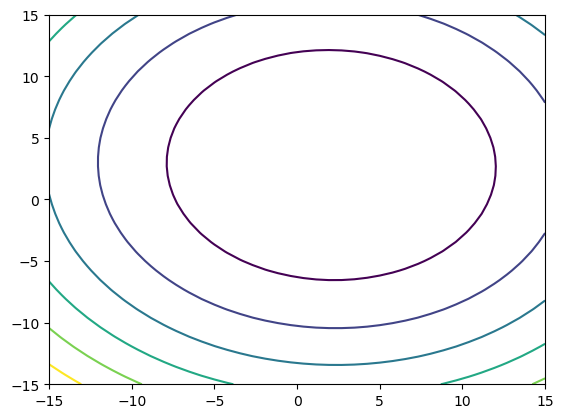

PyObject <matplotlib.contour.QuadContourSet object at 0x7f58e1fa4210>

In [3]:
f(x) = 2 + 3*x
fe(m, c, x) = c + m*x

r = MersenneTwister(40)
x = randn(r, 100)
# x = -1:.01:1

n = 40
mn = n
cn = n
m = linspace(-15, 15, mn)
c = linspace(-15, 15, cn)

mgrid = repmat(m', cn, 1);
cgrid = repmat(c, 1, mn);

RSS(y, ye) = (y-ye)'*(y-ye)
MSE(y, ye) = RSS(y, ye)/length(y)

# la = [(loss(mi, ci, x[i], y_train[i])) for ci in c, mi in m, i=1:length(x)]
# l = sum(la, 3)/length(x)

y = f(x)
y_train = y + 1*randn(length(y))

rmss_grid = zeros(length(c), length(m))
for i = 1:length(c)
    for j = 1:length(m)
        ye = fe(m[j], c[i], x)
        rmss_grid[i,j] = MSE(y_train, ye)[1]
    end
end
# rmss_grid = [RMSS(y, fe(m[j], c[i], x))[1] for i = 1:length(c), j = 1:length(m)]

# plot_surface(cgrid, mgrid, l[:,:,1], rstride=4, cstride=4, cmap=ColorMap("gray"), alpha=0.4, linewidth=0.1)
# plot_surface(cgrid, mgrid, rmss_grid, rstride=4, cstride=4, cmap=ColorMap("gray"), alpha=0.4, linewidth=0.1)
contour(cgrid, mgrid, rmss_grid)


$$\frac{d}{dx}(f(x)g(x)) = f'(x)g(x) + f(x)g'(x)$$

$$\frac{d}{dx}(f(x))^2 = 2f'(x)f(x)$$

$$\frac{d}{dx}(g(f(x))) = f'(g(x)) \cdot g'(x)$$


In [4]:
function OLS(x,y)
    x_var = var(x)
    xy_cov = cov(x,y)

    b1 = xy_cov/x_var
    b0 = mean(y) - b1*mean(x)
    (b0, b1)
end

(c, m) = OLS(x, y_train)
println("c = $c")
println("m = $m")


c = 2.064104173375347
m = 2.7935994764087413


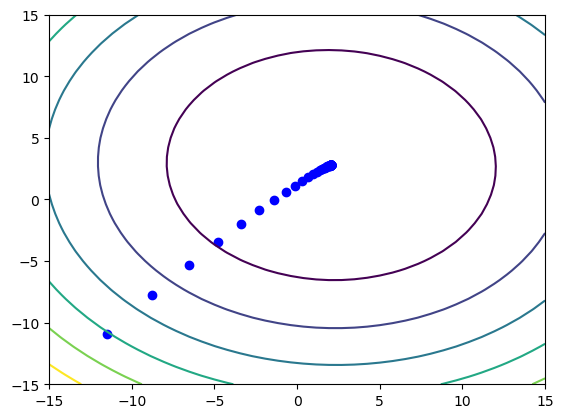

me = 2.793599476733586
ce = 2.0641041702448124


1×1 Array{Float64,2}:
 0.912413

In [5]:
function derivative_function(m, c)
    dm=0
    dc=0
    N = length(x)
    for i=1:N
        tmp = y_train[i] - fe(m,c,x[i])
        dc += tmp
        dm += tmp*x[i]
    end
    (-2*dm/N, -2*dc/N)
end

# initial conditions
me = -15
ce = -15

contour(cgrid, mgrid, rmss_grid)

for i=1:100
    (dm, dc) = derivative_function(me, ce)
    me -= .1*dm
    ce -= .1*dc
    scatter(ce, me, color="blue")
    # scatter([1:10], [15:24], color="blue")
end
println("me = $me")
println("ce = $ce")

rss = (y - y_train)'*(y - y_train)
mean_y = mean(y)
tss = (y - mean_y)'*(y - mean_y)
R2 = 1 - rss/tss

In [6]:
r=1:4

1:4

In [7]:
x = y = collect(r)

4-element Array{Int64,1}:
 1
 2
 3
 4

In [9]:
(x*ones(length(y))')'

4×4 Array{Float64,2}:
 1.0  2.0  3.0  4.0
 1.0  2.0  3.0  4.0
 1.0  2.0  3.0  4.0
 1.0  2.0  3.0  4.0

In [10]:
(y*ones(length(x))')

4×4 Array{Float64,2}:
 1.0  1.0  1.0  1.0
 2.0  2.0  2.0  2.0
 3.0  3.0  3.0  3.0
 4.0  4.0  4.0  4.0